In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("Train_data.csv")
data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,icmp,50,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos
6,0,icmp,50,4,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
7,0,icmp,50,4,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,dos
8,0,icmp,52,4,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
9,0,icmp,50,4,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,dos


In [4]:
data.shape

(125973, 42)

In [5]:
data[data.isnull().any(axis=1)]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack


In [6]:
data["protocol_type"].value_counts()

icmp    102689
udp      14993
tcp       8291
Name: protocol_type, dtype: int64

In [7]:
"""#cat.codes
data["protocol_type"]=data["protocol_type"].astype("category")
data["protocol_type"] = data["protocol_type"].cat.codes"""
protocol_replace = {"protocol_type": {"icmp": 1,"udp":2,"tcp":3}}
data.replace(protocol_replace,inplace=True)
data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,1,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,1,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


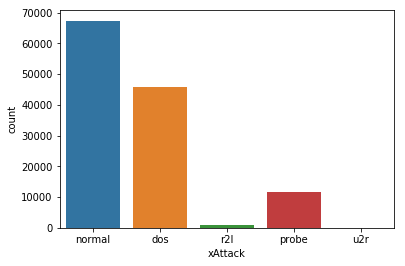

In [8]:
sns.countplot(x="xAttack",data=data)

In [9]:
data["xAttack"].value_counts()

normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: xAttack, dtype: int64

In [10]:
#replace the values
label_replace = {"xAttack": {"normal": 3,"probe":2,"r2l":1,"u2r":1,"dos":1}}
data.replace(label_replace,inplace=True)
data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,1,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,3
1,0,2,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,3
2,0,1,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,3
4,0,1,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3


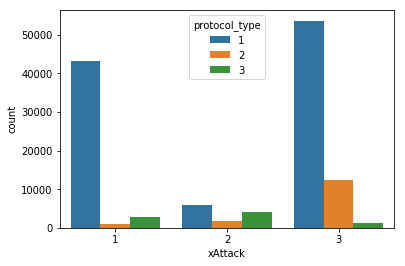

In [11]:
sns.countplot(x="xAttack",hue="protocol_type",data=data)

In [12]:
x=data.drop('xAttack',axis=1)
y=data['xAttack']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3)

In [31]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
#p_train=lr.predict(X_train)
lr_p=lr.predict(X_test)
#lr_p

In [ ]:
"""from sklearn.svm import SVC
sv = SVC(kernel='linear')
#sv = SVC(kernel='rbf')
sv.fit(X_train,y_train)
sv_p=sv.predict(X_test)"""

In [25]:
from sklearn.linear_model import Perceptron
prc = Perceptron(random_state=100,max_iter=20,tol=0.001)
prc.fit(X_train,y_train)
prc_p=prc.predict(X_test)

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5)
dt.fit(X_train, y_train)
dt_p = dt.predict(X_test)

In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_p = xgb.predict(X_test)

ModuleNotFoundError: No module named 'xgboost'

In [31]:

#accuracy_score(y_test,lr_p)
#accuracy_score(y_test,sv_p)
#accuracy_score(y_test,prc_p)
accuracy_score(y_test,dt_p)
#accuracy_score(y_test,xgb_p)

0.9845734546994073

In [40]:
#accuracy_score(y_train,p_train)

0.8442975244100203

In [76]:
#TEST DATA
test_data=pd.read_csv("test_data.csv")
test_data.head(5)

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,202,0,icmp,25,4,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,768,0,icmp,25,2,312,1856,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,3753,0,icmp,25,2,245,2058,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,20087,0,icmp,25,2,298,1267,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,16159,0,icmp,20,2,740,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal


In [77]:
test_protocol_replace = {"protocol_type": {"icmp": 1,"udp":2,"tcp":3}}
test_data.replace(test_protocol_replace,inplace=True)
test_label_replace = {"xAttack": {"normal": 3,"probe":2,"r2l":1,"u2r":1,"dos":1}}
test_data.replace(test_label_replace,inplace=True)
test_data.head(5)

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,202,0,1,25,4,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,1
1,768,0,1,25,2,312,1856,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,3
2,3753,0,1,25,2,245,2058,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,3
3,20087,0,1,25,2,298,1267,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3
4,16159,0,1,20,2,740,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,3


In [78]:
test_data.columns

Index(['Unnamed: 0', 'duration', 'protocol_type', 'service', 'flag',
       'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'xAttack'],
      dtype='object')

In [79]:
test_data.rename(columns={'Unnamed: 0':'id'}, inplace=True)

In [80]:
test_data.columns

Index(['id', 'duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'xAttack'],
      dtype='object')

In [81]:
id1=test_data.iloc[:,0]

In [82]:
id1

0         202
1         768
2        3753
3       20087
4       16159
5       18012
6       15066
7        6541
8       10031
9       14225
10      11041
11       2857
12       4471
13       4270
14       9933
15      18035
16      18176
17        716
18       7194
19      20934
20      22117
21      15086
22      13813
23       7638
24       9574
25      14771
26      12999
27      13056
28      21427
29       6808
        ...  
9970     8041
9971    11250
9972    15643
9973    21516
9974      556
9975     3054
9976    18525
9977     4698
9978     1026
9979    22325
9980     7572
9981    17205
9982    18250
9983    17877
9984    12450
9985    12283
9986    11544
9987     6307
9988     2238
9989    20466
9990     9735
9991     8608
9992     6826
9993     3775
9994    16292
9995    18755
9996     5628
9997     8493
9998    11630
9999    14847
Name: id, Length: 10000, dtype: int64

In [83]:
x1=test_data.iloc[:,1:-1]
x1.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,25,4,0,0,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32
1,0,1,25,2,312,1856,0,0,0,0,...,1,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00
2,0,1,25,2,245,2058,0,0,0,0,...,114,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00
3,0,1,25,2,298,1267,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,1,20,2,740,0,0,0,0,0,...,104,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00


In [84]:
y1=test_data.iloc[:,-1]
y1.head(5)

0    1
1    3
2    3
3    3
4    3
Name: xAttack, dtype: int64

In [85]:
x1.shape

(10000, 41)

In [86]:
y1

0       1
1       3
2       3
3       3
4       3
5       3
6       2
7       1
8       1
9       3
10      1
11      3
12      3
13      1
14      1
15      2
16      3
17      3
18      1
19      1
20      1
21      3
22      1
23      3
24      3
25      1
26      3
27      2
28      1
29      3
       ..
9970    1
9971    1
9972    1
9973    2
9974    3
9975    2
9976    1
9977    2
9978    1
9979    1
9980    1
9981    1
9982    1
9983    1
9984    2
9985    2
9986    1
9987    1
9988    1
9989    1
9990    1
9991    3
9992    1
9993    3
9994    3
9995    3
9996    3
9997    3
9998    3
9999    1
Name: xAttack, Length: 10000, dtype: int64

In [87]:
test1 = dt.predict(x1)

In [88]:
test1

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [89]:
accuracy_score(y1,test1)

0.7439

In [90]:
result = pd.DataFrame({'id':id1,'label':test1},columns=['id','label'])
result.head(5)

,id,label
0,202,3
1,768,3
2,3753,3
3,20087,3
4,16159,3


In [59]:
#np.savetxt("result.csv",result,delimiter=",",header="id,label")

In [137]:
def func(row):
    xml = ['<permission>']
    for field in row.index:
        xml.append('  <{0}>{1}</{0}>'.format(field, row[field]))
    xml.append('</permission>')
    return '\n'.join(xml)

xml_res='\n'.join(result.apply(func, axis=1))
with open("permission.xml", "w") as f:
        f.write(xml_res)

In [93]:
b_names=pd.read_csv("baby-names.csv")
b_names.head(5)

,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy


In [102]:
b_names=b_names.drop(columns=["year","percent","sex"])


KeyError: "['year' 'percent' 'sex'] not found in axis"

In [103]:
b_names.head(5)

,name
0,John
1,William
2,James
3,Charles
4,George


In [111]:
data_users=pd.DataFrame({"id":id1},columns=["id"])
data_users["name"]=b_names
data_users.head(5)

,id
0,202
1,768
2,3753
3,20087
4,16159


In [120]:
data_users["password"]=data_users["name"].astype(str)+"123"

In [124]:
data_users["email"]=data_users["name"].str.lower()+"@ids.com"

In [126]:
avatar1=[x for x in range(len(id1))]
avatar1

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [133]:
data_users["avatar"]=avatar1
data_users["avatar"]=data_users["avatar"].astype(str)+".png"

In [142]:
data_users.head(5)

,id,name,password,email,avatar
0,202,John,John123,john@ids.com,0.png
1,768,William,William123,william@ids.com,1.png
2,3753,James,James123,james@ids.com,2.png
3,20087,Charles,Charles123,charles@ids.com,3.png
4,16159,George,George123,george@ids.com,4.png


In [139]:
def user_func(row):
    xml = ['<user>']
    for field in row.index:
        xml.append('  <{0}>{1}</{0}>'.format(field, row[field]))
    xml.append('</user>')
    return '\n'.join(xml)

xml_out='\n'.join(data_users.apply(user_func, axis=1))
#print(xml_out)
with open("user.xml", "w") as f:
        f.write(xml_out)